In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

# Probability Theory

Consider two random variables $X$ and $Y$. The probability that both $X=x_i$ and $Y=y_j$ is called the joint probability:

$$ p(X=x_i,Y=y_j) = \frac{n_{ij}}{N}$$

where $n_{ij}$ is the number of trials where both $X=x_i$ and $Y=y_j$, and $N$ is the total number of trials where we sample both $X$ and $Y$. Here we assume $N\to\infty$.

The probability $X$ takes the value $x_i$ is 

$$p(X=x_i) = \frac{c_i}{N}$$

where $c_i$ is the number of trials where $X$ takes the value $x_i$. 

We can deduce $c_i$ by summing $n_{ij}$ over all instances of $j$. I.e.

$$c_i = \sum_jn_{ij}$$.

This gives,

\begin{align}
p(X=x_i) &=\frac{c_i}{N}\\
&= \sum_j\frac{n_{ij}}{N}\\
&= \sum_{j=1}^LP(X=x_i,Y=y_j)
\end{align}

This is called the **sum rule**.

Suppose we want to find the instances of $Y=y_j$ given that $X=x_i$. This is defined as,

$$p(Y=y_j| X=x_i) = \frac{n_{ij}}{c_i}$$

This is called the **conditional** probability.

We can now derive the following

\begin{align}
p(X=x_i,Y=y_j) &= \frac{n_{ij}}{N}\\
&=\frac{n_{ij}}{c_i}\cdot\frac{c_i}{N}\\
&=p(Y=y_j| X=x_i)p(X=x_i)
\end{align}

This is called the **product rule**.

The code below generates points according to a distribution over two variables, X, which takes 9 values, and, Y, which takes 2 values. These values are represented by the red grid. The histograms show the marginal distributions $p(X)$,$p(Y)$ as well as the conditional distribution $p(X|Y=1)$.

In [2]:
#This lets use generate a normal distribution of points with boundaries
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

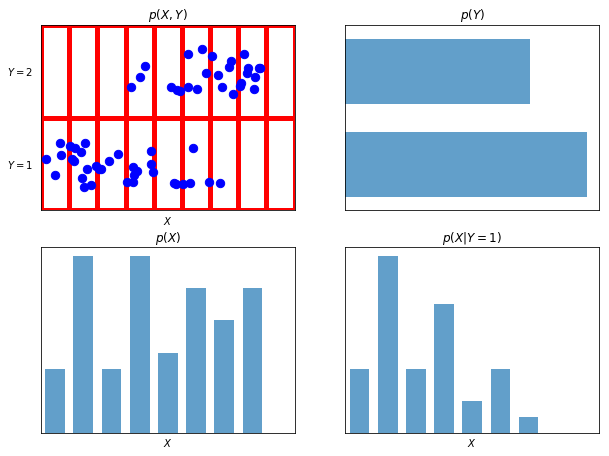

In [3]:
#First we generate our set of points according to each distribution.
#p(x|y=1)
x1 = get_truncated_normal(mean=2.5, sd=2, low=0.1, upp=6.9).rvs(34)
#p(y=1)
y1=np.random.uniform(0.25,0.75,size=34)
#p(x|y=2)
x2 = get_truncated_normal(mean=6.5, sd=2, low=3.1, upp=8.9).rvs(26)
#p(y=2)
y2=np.random.uniform(1.25,1.75,size=26)

#We join the arrays together
x_join = np.concatenate((x1,x2))
y_join = np.concatenate((y1,y2))

#Then we plot them
fig = plt.figure(figsize = (10,7.5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2,sharey=ax1)
ax3 = fig.add_subplot(2,2,3,sharex=ax1)
ax4 = fig.add_subplot(2,2,4,sharex=ax1)

axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

for i in range(0,2+1):
    ax1.axhline(i,linewidth=5,c='r',zorder=-1)

for i in range(0,9+1):
    ax1.axvline(i,linewidth=5,c='r',zorder=-1)
    
ax1.scatter(x_join,y_join,zorder=1,c='b',s=70)
ax1.set_xlim(0,9)
ax1.set_ylim(0,2)
ax1.set_title(r'$p(X,Y)$')
ax1.text(-1.2,0.45,r'$Y=1$')
ax1.text(-1.2,1.45,r'$Y=2$')
ax1.set_xlabel(r'$X$')

ax2.set_title(r'$p(Y)$')
ax2.hist(y_join,bins=range(0,2+1), rwidth=0.7,alpha=0.7,orientation='horizontal')

ax3.set_title(r'$p(X)$')
ax3.hist(x_join, bins=range(0,9+1), rwidth=0.7,alpha=0.7)
ax3.set_xlabel(r'$X$')

ax4.set_title(r'$p(X|Y=1)$')
ax4.hist(x1, bins=range(0,9+1), rwidth=0.7,alpha=0.7)
ax4.set_xlabel(r'$X$')

plt.show()

#### Bayes theorem

Since $p(X,Y) = p(Y,X)$ then

\begin{align}
p(Y|X)p(X) &= p(X|Y)p(Y)\\
p(Y|X)&= \frac{p(X|Y)p(Y)}{p(X)}\\
&=\frac{p(X|Y)p(Y)}{\sum_Yp(X|Y)p(Y)}
\end{align}

This is called **Bayes' theorem**.

#### Example

Imagine a red box with 2 apples and 6 oranges in it and a blue box with 1 apple and 3 oranges in it.

The probability of selecting the red box is $p(B=r) = 4/10$.

The probability of selecting the blue box is $p(B=b) = 6/10$.

Thus $p(B=b)+p(B=r) = 1$

The probability of picking an apple from the blue box is $p(F=a|B=b) = 3/4$.
Similarly,

\begin{align}
p(F=a|B=r)&=1/4\\
p(F=o|B=r)&=3/4\\
p(F=o|B=b)&=1/4
\end{align}

Again, these are normalised such that,

\begin{align}
p(F=a|B=r)+p(F=o|B=r)&=1\\
p(F=a|B=b)+p(F=o|B=b)&=1
\end{align}

The probability of choosing an apple can thus be calculated as follows:

\begin{align}
p(F=a) &= p(F=a|B=r)p(B=r)+p(F=a|B=b)p(B=b)\\
&=\frac{1}{4}\cdot\frac{4}{10}+\frac{3}{4}\cdot\frac{6}{10}\\
&=\frac{11}{20}
\end{align}

Thus the probability of choosing an orange is $p(F=o) = 1-11/20 = 9/20$.

Suppose we choose an orange and we would like to know the probability of it coming from a red box,

\begin{align}
p(B=r|F=o)&=\frac{p(F=o|B=r)p(B=r)}{p(F=o)}\\
&=\frac{3}{4}\times\frac{4}{10}\times\frac{20}{9}\\
&=\frac{2}{3}
\end{align}

### Exercise 1.3

Probability of picking red, blue, and green boxes are

$$p(r)=0.2,p(b)=0.2,p(g)=0.6$$

The probability of picking an apple from a red box is $p(a|r)=3/10$.
Similarly,

$$
p(o|r) = 4/10,p(l|r)=3/10\\
p(a|b) = 1/2,p(o|b)=1/2,p(l|b)=0\\
p(a|g) = 3/10,p(o|g)=3/10,p(l|g)=4/10\\
$$

The probability of selecting an apple is given by combining the sum and product rules:

\begin{align}
p(a) &= \sum_{i=r,g,b}p(a|i)p(i)\\
&=p(a|r)p(r)+p(a|g)p(g)+p(a|b)p(b)\\
&=0.3\times0.2+0.3\times0.6+0.5\times0.2\\
p(a)&=0.34
\end{align}

The probability that an orange fruit came from green box is given by using Bayes' rule:

\begin{align}
p(g|o) &= \frac{p(o|g)p(g)}{p(o)}\\
&=\frac{p(o|g)p(g)}{\sum p(o|i)p(i)}\\
&=\frac{p(o|g)p(g)}{p(o|r)p(r)+p(o|g)p(g)+p(o|b)p(b)}\\
&=\frac{0.3\times0.6}{0.36}\\
p(g|o)&=0.5
\end{align}

## Probability Densities

Given a probability density $p(x)$ over $x$. The probability that $x$ lies in the interval between $a$ and $b$ is given by

$$ p(x\in(a,b)) = \int^b_ap(x)dx$$

and must satisfy the following conditions;

$$
p(x)\geq0\\
\int^\infty_{-\infty}p(x)dx = 1
$$

#### Nonlinear change of variable

Let us consider a change of variable $x=g(y)$ then $f(x) \rightarrow \tilde{f}(y)=f(g(y))$

For observations $(x,x+\delta x) \rightarrow (y,y+\delta y)$,

$$p_x(x)\delta x \simeq p_y(y)\delta y$$

Thus,

\begin{align}
p_y(y) &= p_x(x)\bigg|\frac{dx}{dy}\bigg|\\
&=p_x(g(y))|g'(y)|
\end{align}

This means that the maximum of the probability density is dependent on the choice of variable:

#### Exercise 1.4

We differentiate equation (1.27):

$$
p^\prime_y(y) = p^\prime_x(g(y))\{g^\prime(y)\}^2 + p_x(g(y))g^{\prime\prime}(y)
$$

We know that at the maximum $x=\hat{x}$, $p^\prime_x(\hat{x}) = 0$. When $x=g(y)$ is linear then $g^{\prime\prime}(\hat y) = 0$ thus $p^\prime_x(g(\hat y))=0$. When $x=g(y)$ is not linear then the second term on the equation above does not go to zero and thus $\hat x = g(\hat y) $ does not hold.

Let's illustrate with an example where $g(y) = ln(y)-ln(1-y)+5$, and $p_x(x)$ is a Gaussian with mean $\mu=6$ and standard deviation $\sigma = 1$, from which we sample $N=100,000$ points. We then transform both the probability density function and those samples, where we see that the mode for the sample shifts.

In [4]:
def gaussian(x,mu=0,sigma=1):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((x-mu)**2)/(2*sigma**2))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


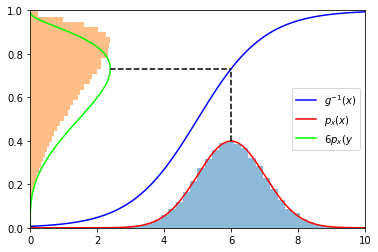

2.39365357618275


In [5]:
def g_y(y):
    return np.log(y) - np.log(1-y) + 5

def g_1_x(x):
    return 1/(1+np.exp(-x+5))

mu=6
sigma=1

x_range = np.linspace(0.001,10,1000)
y_range = np.linspace(0.001,1,1000)
p_xOfx=gaussian(x_range,mu,sigma)
p_xOfy=gaussian(g_y(y_range), mu, sigma)*6
gOfx = g_1_x(x_range)

N=100000
p_x_sample = np.random.normal(mu,sigma,N)
p_y_sample = g_1_x(p_x_sample)

plt.figure()
N_bins = 40
n,bins,patches = plt.hist(p_x_sample,bins=N_bins,density='True', alpha=0.5)
bins_centred = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
plt.plot(x_range,gOfx,'b',label=r'$g^{-1}(x)$')
plt.plot(x_range,p_xOfx,'r',label=r'$p_x(x)$')
plt.plot(p_xOfy,y_range, 'lime', label=r'$6p_x(y$')
loc_xOfy_peak = y_range[np.argmax(p_xOfy)]
loc_xOfx_peak = x_range[np.argmax(p_xOfx)]
plt.axhline(loc_xOfy_peak, xmin = np.max(p_xOfy)/10, xmax = loc_xOfx_peak/10, linestyle = 'dashed', c='k')
plt.axvline(loc_xOfx_peak, ymin = np.max(p_xOfx), ymax = loc_xOfy_peak, linestyle = 'dashed', c='k')
n,bins,patches = plt.hist(p_y_sample,bins=N_bins,density='True', alpha=0.5,orientation='horizontal')
plt.xlim(0,10)
plt.ylim(0,1)
plt.legend()
plt.show()

print(np.max(p_xOfy))

### Cumulative Probability

The cumulative probability density is the probability that $x$ lies in the interval ($-\infty,z$) and is defined as,

$$
P(z) = \int^z_{-\infty}p(x)\text d x
$$

This satisfies $P^\prime(x) = p(x) as shown in Figure 1.12

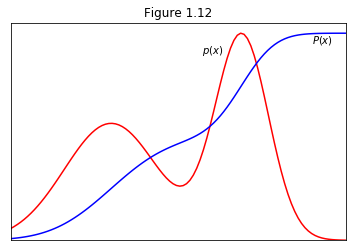

In [6]:
from scipy.stats import norm

x = np.linspace(0,1,100)

cdf1 = norm.cdf(x,0.3,0.14)
cdf2 = norm.cdf(x,0.69,0.08)

cdf = cdf1+cdf2
cdf = cdf/np.max(cdf)

pdf1 = norm.pdf(x,0.3,0.14)
pdf2 = norm.pdf(x,0.69,0.08)

pdf = pdf1+pdf2
pdf = pdf/np.max(pdf)

plt.figure()
plt.plot(x,pdf,c='red')
plt.plot(x,cdf,c='blue')
plt.xticks([])
plt.yticks([])
plt.title('Figure 1.12')
plt.text(0.57,0.9,r'$p(x)$')
plt.text(0.9,0.95,r'$P(x)$')

plt.xlim(0,1)
plt.ylim(0)
plt.show()

**Multivariate PDF**

For a set of continuous variables $x_1,...,x_D$ The joint probability density is $p(\mathbf x ) = p(x_1,...,x_D)$, with

\begin{align}
p(\mathbf x) &\geq 0 \\
\int p(\mathbf x) \text d \mathbf x &= 1
\end{align}

This is also true for probability densities over a combination of discrete and continuous variables.

Bayes Rule applies to continuous variables as well as the **sum and product rules**: 

\begin{align}
p(x) &= \int p(x,y)\text d y \\
p(x,y) &= p(y|x)p(x)
\end{align}

### Expectations and Covariances

The expectation of some function $f(x)$ is the average value of $f(x)$ under a probability distribution $p(x)$. This is denoted by $\mathbb E[f]$.

**Discrete:**
$$\mathbb E[f] = \sum_x p(x)f(x)$$
**Continuous:**
$$\mathbb E[f] = \int p(x)f(x)\text d x$$

For $N$ points drawn from either distribution then $\mathbb E[f]$ can be approximated as:

$$\mathbb E[f] \simeq \frac{1}{N}\sum^N_{n=1}f(x_n)$$

**Multiple variables**

$$\mathbb E_x[f(x,y)]$$

denotes the average of $f(x,y)$ w.r.t $x$. This will then be a function of $y$.

**Conditional expectation:**
$$\mathbb E[f|y] = \sum_x p(x|y)f(x)$$

The **variance** of $f(x)$ is,
\begin{align}
\text{var} [f] &= \mathbb E[(f(x)-\mathbb E[f(x)])^2]\\
\end{align}
***
#### Exercise 1.5
Derive $\text{var}[f] = \mathbb E[f(x)^2]-\mathbb E[f(x)]^2$:

\begin{align}
\text{var}[f] &= \mathbb E[(f(x)-\mathbb E[f(x)])^2]\\
&= \mathbb E[f(x)^2-2f(x)\mathbb E[f(x)]+\mathbb E[f(x)]^2]\\
&= \mathbb E[f(x)^2]-2 \mathbb E[f(x)]\mathbb E[f(x)]+\mathbb E[f(x)]^2\\
&= \mathbb E[f(x)^2]-\mathbb E[f(x)]^2
\end{align}
***
Similarly, the variance of a variable is,
$$\text{var}[x]=\mathbb E[x^2]-\mathbb E[x]^2$$

For two random variables, the **covariance** is,
\begin{align}
\text{cov} [x,y] &= \mathbb E_{x,y}[\{x-\mathbb E[x]\}\{y-\mathbb E[y]\}]\\
&=\mathbb E_{x,y}[xy]-\mathbb E[x] \mathbb E[y]
\end{align}
If $x$ and $y$ are independent then the covariance is zero.

***
#### Exercise 1.6
When $x$ and $y$ are independent then $p(x,y)=p(x)p(y)$. Therefore,

\begin{align}
\mathbb E_{x,y}[xy] &= \int\int xyp(x,y)\text d x\text d y\\
&= \int\int xyp(x)p(y)\text d x\text d y \\
&= \int xp(x)\text d x\int yp(y)\text d y\\
&= \mathbb E[x]\mathbb E[y]
\end{align}
Thus $\text{cov}[x,y] = 0$
***
For two vectors, $\mathbf x$ and $\mathbf y$,
\begin{align}
\text{cov}[\mathbf x,\mathbf y] &= \mathbb E_{\mathbf x,\mathbf y}[\{\mathbf x = \mathbb E[\mathbf x]\}\{\mathbf y^T-\mathbb E[\mathbf y^T]\}]\\
&=\mathbb E_{\mathbf x,\mathbf y}[\mathbf x \mathbf y^T]-\mathbb E[\mathbf x]\mathbb E[\mathbf y^T]
\end{align}

### Bayesian Probabilities

Bayes rule:
\begin{align}
    p(\mathbf{w}|\mathcal D) = \frac{p(\mathcal D|\mathbf w)p(\mathbf w)}{p(\mathcal D)}
\end{align}

or
\begin{align}
\text{posterior} \propto \text{likelihood}\times\text{prior}
\end{align}

Integrate $p(\mathbf w|\mathcal D)$ wrt $\mathbf{w}$ to get the normalisation term:
\begin{align}
\int p(\mathbf {w}|\mathcal D)d\mathbf{w} &= \int \frac{p(\mathcal D|\mathbf w)p(\mathbf w)}{p(\mathcal D)} d\mathbf{w}\\
1&=\int \frac{p(\mathcal D|\mathbf w)p(\mathbf w)}{p(\mathcal D)} d\mathbf{w}\\
p(\mathcal D)&=\int p(\mathcal D|\mathbf w)p(\mathbf w)d\mathbf{w}
\end{align}

Technique: maximise the likelihood function $p(\mathcal D|\mathbf w)$ or minimise the error function i.e. $-\ln p(\mathcal D|\mathbf w)$

### The Gaussian Distribution

Definition:
\begin{align}
\mathcal N(x|\mu,\sigma^2) =\frac{1}{(2\pi\sigma^2)^{1/2}}\exp \bigg\{-\frac{1}{2\sigma^2}(x-\mu)^2\bigg\}
\end{align}

where $\mu$ is the mean, $\sigma^2$ is the variance, $\sigma$ is the standard deviation, $\beta = 1/\sigma^2$ is the precision.

*Plot:*

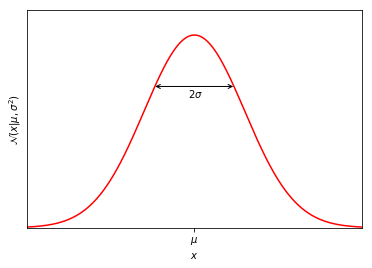

In [7]:
def gaussian(x,mu=0,sigma=1):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((x-mu)**2)/(2*sigma**2))

x = np.linspace(0,10,1000) 
plt.figure()
plt.xlim(0,10)
plt.ylim(0,0.3)
plt.plot(x,gaussian(x,5,1.5),'r')
plt.xticks([5],[r'$\mu$'])
plt.yticks([])
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathcal{N}(x|\mu,\sigma^2)$')
plt.annotate(s='', xy=(3.77,0.195), xytext=(3.77+2*np.sqrt(1.5),0.195), arrowprops=dict(arrowstyle='<->'))
plt.text(4.8,0.18,r'$2\sigma$')
plt.show()

***
We can show that the Gaussian is normalised:

**Exercise 1.7**
Consider
\begin{align}
I&=\int^\infty_{-\infty} \exp\bigg\{-\frac{1}{2\sigma^2}x^2\bigg\}\text{d}x\\
I^2&=\int^\infty_{-\infty}\int^\infty_{-\infty}\exp\bigg\{-\frac{1}{2\sigma^2}x^2-\frac{1}{2\sigma^2}y^2\bigg\}\text{d}x\text{d}y
\end{align}

In polar coords: $x=r\cos\theta$, $y=r\sin\theta$, and $\text{d} x\text{d}y = r\text{d}r\text{d}\theta$. Thus

\begin{align}
I^2 &= \int^{r=+\infty}_{r=0}\int^{\theta=2\pi}_{\theta=0}\exp\bigg\{-\frac{1}{2\sigma^2}r^2\bigg\}r\text dr\text d\theta\\
u=r^2 \Rightarrow I^2&= \int^{r=+\infty}_{r=0}\int^{\theta=2\pi}_{\theta=0}\exp\bigg\{-\frac{1}{2\sigma^2}u\bigg\}\frac{1}{2}\text du\text d\theta\\
&= -\sigma^2\int^{\theta=2\pi}_{\theta=0}\bigg[\exp\bigg\{-\frac{1}{2\sigma^2}u\bigg\}\bigg]^\infty_0\text d\theta\\
&= -\sigma^2\int^{\theta=2\pi}_{\theta=0}\bigg[0-1\bigg]\text d\theta\\
&= \sigma^2\int^{\theta=2\pi}_{\theta=0}\text d\theta\\
&=\sigma^2[2\pi-0]\\
&=2\pi\sigma^2\\
\therefore I&=(2\pi\sigma^2)^{1/2}
\end{align}

Now we prove that
\begin{align}
\int^\infty_{-\infty} \mathcal N(x|\mu,\sigma^2)\text dx = 1
\end{align}

From definition of the Gaussian:
\begin{align}
\int^\infty_{-\infty} \mathcal N(x|\mu,\sigma^2)\text dx &= \int ^\infty_{-\infty}\frac{1}{(2\pi\sigma^2)^{1/2}}\exp\bigg\{-\frac{1}{2\sigma^2}(x-\mu)^2\bigg\}\text dx \\
&=\frac{1}{(2\pi\sigma^2)^{1/2}}\int^\infty_{-\infty}\exp\bigg\{-\frac{1}{2\sigma^2}y^2\bigg\}\text dy \\
&=\frac{1}{(2\pi\sigma^2)^{1/2}} \times I\\
&=1
\end{align}


***
We can derive $\mathbb E[x]$, $\mathbb E[x^2]$ and thus, $\text{var}[x]$.

**Exercise 1.8**

Expectation of $x$:
\begin{align}
\mathbb E[x] &= \int^\infty_{-\infty}\mathcal N(x|\mu,\sigma^2)x\text dx \\
&= \int^\infty_{-\infty}\frac{1}{(2\pi\sigma^2)^{1/2}}\exp\bigg\{-\frac{1}{2\sigma^2}(x-\mu)^2\bigg\}x\text dx\\
&= \frac{1}{(2\pi\sigma^2)^{1/2}}\int^\infty_{-\infty}\exp\bigg\{\frac{1}{2\sigma^2}y^2\bigg\}(y+\mu)\text dy\\
&= \frac{1}{(2\pi\sigma^2)^{1/2}}\Bigg[\int^\infty_{-\infty}y\exp\bigg\{\frac{1}{2\sigma^2}y^2\bigg\}\text dy+\mu\int^\infty_{-\infty}\exp\bigg\{\frac{1}{2\sigma^2}y^2\bigg\}\text dy\Bigg]
\end{align}

The first integrand is odd so disappears. The second integral evaluates to $I=(2\pi\sigma^2)^{1/2}$.

\begin{align}
\therefore \mathbb E[x] &= \frac{1}{(2\pi\sigma^2)^{1/2}}\Bigg[0+\mu(2\pi\sigma^2)^{1/2}\Bigg]\\
&=\mu
\end{align}

Expectation of $x^2$. Start with normalisation condition,rearrange, and differentiate both sides wrt $\sigma^2$:
\begin{align}
\int^\infty_{-\infty} \mathcal N(x|\mu,\sigma^2)\text dx &= 1\\
\int ^\infty_{-\infty}\frac{1}{(2\pi\sigma^2)^{1/2}}\exp\bigg\{-\frac{1}{2\sigma^2}(x-\mu)^2\bigg\}\text dx &= 1\\
\int ^\infty_{-\infty}\exp\bigg\{-\frac{1}{2\sigma^2}(x-\mu)^2\bigg\}\text dx &= (2\pi\sigma^2)^{1/2}\\
\frac{\partial}{\partial \sigma^2}\int ^\infty_{-\infty}\exp\bigg\{-\frac{1}{2\sigma^2}(x-\mu)^2\bigg\}\text dx &= \frac{\partial}{\partial \sigma^2}(2\pi\sigma^2)^{1/2}\\
\frac{1}{2\sigma^4}\int ^\infty_{-\infty}(x-\mu)^2\exp\bigg\{-\frac{1}{2\sigma^2}(x-\mu)^2\bigg\}\text dx &= \frac{1}{2}\bigg(\frac{2\pi}{\sigma^2}\bigg)^{1/2}\\
\int ^\infty_{-\infty}(x-\mu)^2\exp\bigg\{-\frac{1}{2\sigma^2}(x-\mu)^2\bigg\}\text dx &= \sigma^2(2\pi\sigma^2)^{1/2}\\
\int ^\infty_{-\infty}\frac{1}{(2\pi\sigma^2)^{1/2}}\exp\bigg\{-\frac{1}{2\sigma^2}(x-\mu)^2\bigg\}(x-\mu)^2\text dx &= \sigma^2\\
\mathbb E[(x-\mu)^2] &=\sigma^2\\
\mathbb E[x^2-2x\mu+\mu^2]&=\sigma^2\\
\mathbb E[x^2] -2\mu\mathbb E[x] +\mu^2 &= \sigma^2\\
\mathbb E[x^2] &= 2\mu^2-\mu^2+\sigma^2\\
\mathbb E[x^2] &= \mu^2+\sigma^2\\
\end{align}

Thus we can find the variance of $x$:

\begin{align}
\text{var}[x] &= \mathbb E[x^2]-\mathbb E[2]^2\\
&=\mu^2+\sigma^2-\mu^2\\
&=\sigma^2
\end{align}
***

The multivariate Gaussian over D-dimensions is given by:
\begin{align}
\mathcal N(\mathbf x|\mathbf\mu,\mathbf\Sigma) = \frac{1}{(2\pi)^{D/2}}\frac{1}{|\mathbf\Sigma|^{1/2}}\exp\bigg\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\mathbf{\Sigma}^{-1}(\mathbf{x}-\mathbf{\mu})\bigg\}
\end{align}

**Exercise 1.9**

We can derive the mode for the univariate Gaussian:
\begin{align}
\frac{\partial}{\partial x}\mathcal N(x|\mu,\sigma^2)&=0\\
\frac{\partial}{\partial x}\bigg[\frac{1}{(2\pi\sigma^2)^{1/2}}\exp\bigg\{-\frac{1}{2\sigma^2}(x-\mu)^2\bigg\}\bigg]&=0\\
\frac{1}{(2\pi\sigma^2)^{1/2}}\frac{2(x-\mu)}{2\sigma^2}\exp\bigg\{-\frac{1}{2\sigma^2}(x-\mu)^2\bigg\}&=0\\
(x-\mu)\exp\bigg\{-\frac{1}{2\sigma^2}(x-\mu)^2\bigg\}&=0\\
\therefore x&=\mu
\end{align}

And for multivariate Gaussian:
We can derive the mode for the univariate Gaussian:
\begin{align}
\frac{\partial}{\partial \mathbf x}\mathcal N(\mathbf x|\mathbf\mu,\mathbf\Sigma)&=0\\
\frac{\partial}{\partial \mathbf x}\bigg[\frac{1}{(2\pi)^{D/2}}\frac{1}{|\mathbf\Sigma|^{1/2}}\exp\bigg\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\mathbf{\Sigma}^{-1}(\mathbf{x}-\mathbf{\mu})\bigg\}\bigg]&=0\\
\frac{\partial}{\partial \mathbf x}\bigg[\exp\bigg\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\mathbf{\Sigma}^{-1}(\mathbf{x}-\mathbf{\mu})\bigg\}\bigg]&=0\\
\end{align}

We calculate the derivative of the exponent:
\begin{align}
    &\frac{\partial}{\partial \mathbf x}\bigg[(\mathbf{x}-\mathbf{\mu})^T\mathbf{\Sigma}^{-1}(\mathbf{x}-\mathbf{\mu})\bigg]\\
    &=\frac{\partial}{\partial \mathbf x}\bigg[(\mathbf x-\mathbf \mu)^T\mathbf\Sigma^{-1}\bigg](\mathbf x-\mathbf\mu)+(\mathbf x-\mathbf \mu)^T\mathbf\Sigma^{-1}\frac{\partial}{\partial \mathbf x}\bigg[(\mathbf x-\mathbf\mu)\bigg]\\
    &=\mathbf \Sigma^{-1}(\mathbf x-\mathbf\mu)+(\mathbf x-\mathbf\mu)^T\mathbf\Sigma^{-1}\\
    &=\mathbf \Sigma^{-1}(\mathbf x-\mathbf\mu)+\mathbf\Sigma^{-1}(\mathbf x-\mathbf\mu)\\
    &=2\mathbf \Sigma^{-1}(\mathbf x-\mathbf\mu)\\
\end{align}

Thus
\begin{align}
    \frac{\partial}{\partial \mathbf x}\bigg[\exp\bigg\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\mathbf{\Sigma}^{-1}(\mathbf{x}-\mathbf{\mu})\bigg\}\bigg]&=0\\
    \mathbf \Sigma^{-1}(\mathbf x-\mathbf\mu)\bigg[\exp\bigg\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\mathbf{\Sigma}^{-1}(\mathbf{x}-\mathbf{\mu})\bigg\}\bigg]&=0\\
    \therefore \mathbf{x} &= \mathbf{\mu}
\end{align}
***

We can also look at the expectation and variance of the sum of two independent variables:

**Exercise 1.10**

Expectation:
\begin{align}
    \mathbb E[x+z] &= \int p(x,z)(x+z)\text dx\text dz\\
    &=\int\int p(x)p(z)(x+z)\text dx\text dz\\
    &=\int p(x)x\text dx\int p(z)\text dz + \int p(z)z\text dz\int p(x)\text dx\\
    &=\int p(x)x\text dx + \int p(z)z\text dz\\
    &=\mathbb E[x]+\mathbb E[z]
\end{align}

Variance:
\begin{align}
    \text{var}[x+z] &= \mathbb E\Big[\big((x+z)-\mathbb E[x+z]\big)^2\Big]\\
    &= \int \int p(x,z)\big((x+z)-\mathbb E[x+z]\big)^2\text dx\text dz\\
    &= \int \int \big((x+z)^2+\mathbb E[x+z]^2-2(x+z)\mathbb E[x+z]\big)p(x,z)\text dx\text dz\\
    &= \int\int(x+z)^2p(x,z)\text dx\text dz-2\mathbb E[x+z]\int\int(x+z)p(x,z)\text dx\text dz+\mathbb E[x+z]^2\int\int p(x,z)\text dx\text dz\\
    &=\int \int (x+z^2)p(x,z)\text dx\text dz - \mathbb E[x+z]^2\\
    &=\int\int (x^2+2xz+z^2)p(x)p(z)\text dx\text dz - \mathbb E[x+z]^2\\
    &=\int x^2p(x)\text dx + \int z^2p(z)\text dz + \int \int 2xzp(x)p(z)\text dx\text dz - \mathbb E[x+z]^2\\
    &=\mathbb E[x^2]+\mathbb E[z^2] +2\int xp(x)\text dx\int zp(z)\text dz - (\mathbb E[x]+\mathbb E[z])^2\\ 
    &=\mathbb E[x^2]+\mathbb E[z^2] +2\mathbb E[x]\mathbb E[z] -\mathbb E[x]^2-\mathbb E[z]^2 - 2\mathbb E[x]\mathbb E[z]\\
    &=\mathbb E[x^2]-\mathbb E[x]^2 + \mathbb E[z^2]-\mathbb E[z]^2\\
    &=\text{var}[x]+\text{var}[z]
\end{align}
***

Consider a dataset $\mathbf x = (x_1,...,x_N)^T$ that is drawn from a Gaussian and is independant and identically distributed.

\begin{align}
    p(\mathbf x|\mu,\sigma^2) = \prod^N_{n=1}\mathcal N(x_n|\mu,\sigma^2)
\end{align}

We can derive the log likelihood:
\begin{align}
    \ln p(\mathbf x|\mu,\sigma^2) &= \ln\prod^N_{n=1}\mathcal N(x_n|\mu,\sigma^2)\\
    \ln p(\mathbf x|\mu,\sigma^2) &= \ln\prod^N_{n=1}\frac{1}{(2\pi\sigma^2)^{1/2}}\exp\bigg\{-\frac{1}{2\sigma^2}(x_n-\mu)^2\bigg\}\\
    &=\ln\frac{1}{(2\pi\sigma^2)^{N/2}}\exp\bigg\{\sum^N_{n=1}(-\frac{1}{2\sigma^2}(x_n-\mu)^2)\bigg\}\\
    &=-\frac{N}{2}\ln2\pi\sigma^2+\sum^N_{n=1}(-\frac{1}{2\sigma^2}(x_n-\mu)^2)\\
    &=-\frac{1}{2\sigma^2}\sum^N_{n=1}(x_n-\mu)^2-\frac{N}{2}\ln\sigma^2-\frac{N}{2}\ln2\pi
\end{align}
***

We can use this to derive the sample mean and the sample variance by maximising $\ln p(\mathbf x|\mu,\sigma^2)$ w.r.t. $\mu$ and $\sigma^2$ respectively;

**Exercise 1.11**


For the sample mean we set $ \frac{\partial\ln p}{\partial\mu }= 0$. Thus the second and third term disappear with the derivative of the summation in the first term becoming:

\begin{align}
\frac{\partial(\Sigma(x_n-\mu)^2)}{\partial \mu} &= \frac{\partial(\Sigma(x_n^2+\mu^2-2x_n\mu))}{\partial \mu}\\
&=2\sum (\mu -x_n)\\
&=-2(\sum(x_n) +N\mu)
\end{align}

Therefore

\begin{align}
\frac{\partial\ln p}{\partial\mu } &= 0\\
\frac{1}{2\sigma^2}\times-2(\sum(x_n)-N\mu_{ML}) &=0\\
\sum^N_{n=1}x_n &= N\mu_{ML}\\
\mu_{ML} &=\frac{1}{N}\sum^N_{n=1}x_n
\end{align}

For the sample variance we set $ \frac{\partial\ln p}{\partial\sigma^2 }= 0$:

\begin{align}
\frac{\partial\ln p}{\partial\mu } &= 0\\
\frac{1}{2\sigma^4}\sum^N_{n=1}(x_n-\mu)^2-\frac{N}{2\sigma^2}&=0\\
\frac{1}{\sigma^2_{ML}}\sum^N_{n=1}(x_n-\mu_{ML})^2 &=N\\
\sigma_{ML}^2 =\frac{1}{N}\sum^N_{n=1}(x_n-\mu_{ML})^2
\end{align}
***

In [8]:
#Example of drawing from a Gaussian and then calculating the sample mean and sample variance.

#Draw 100 variates from a distribution with mean 5 and variance 3.
mu = 5
sig_sq = 3
std = np.sqrt(sig_sq)
N = 100

x=np.random.normal(mu, std, N)
sample_mean = np.sum(x)/N
sample_variance = np.sum((x-sample_mean)**2)/N

print(f"Sample mean: {sample_mean:.4}, Sample variance: {sample_variance:.4}")

Sample mean: 5.227, Sample variance: 3.3


We can see here that the sample mean is fairly accurate while the sample variance has been underestimated. This is a limitation of using the maximum likelihood. We can show by taking the expectation of these values, that the maximum likelihood estimates the correct sample mean but underestimates the sample variance by a factor of $\frac{N-1}{N}$
***

**Exercise 1.12**

$\text{(1.49)}\Rightarrow \mathbb E[x] = \int^\infty_{-\infty}\mathcal N(x|\mu,\sigma^2)x\text dx = \mu$

$\text{(1.50)}\Rightarrow \mathbb E[x^2] = \int^\infty_{-\infty}\mathcal N(x|\mu,\sigma^2)x^2\text dx = \mu^2+\sigma^2$

Consider $\mathbb E[x_nx_m]$,

when $n=m$, $\mathbb E[x_n^2] = \mu^2 +\sigma^2$ and

when $n \neq m$, $\mathbb E[x_nx_m] = \mathbb E[x_n]\mathbb E[x_m] = \mu^2$.

Therefore $\mathbb E[x_nx_m] = \mu^2 +I_{n=m}\sigma^2$ where $I_{n=m} = 1$ when $n=m$ and $0$ otherwise.

\begin{align}
\mathbb E[\mu_{ML}] &= \mathbb E\bigg[\frac{1}{N}\sum^N_{n=1}x_n\bigg]\\
&=\frac{1}{N}\sum^N_{n=1}\mathbb E[x_n]\\
&=\frac{1}{N}\sum^N_{n=1}\mu\\
&=\frac{N\mu}{N}\\
&=\mu
\end{align}

\begin{align}
\mathbb E[\sigma^2_{ML}]&=\frac{1}{N}\sum^N_{n=1}\mathbb E[(x_n-\mu_{ML})^2]\\
&=\frac{1}{N}\sum^N_{n=1}\mathbb E[x_n^2-2x_n\mu_{ML}+\mu_{ML}^2]\\
&=\frac{1}{N}\mathbb E\bigg[x_n^2 - \frac{2x_n}{N}\sum^N_{m=1}x_m+\frac{1}{N^2}\sum_{m=1}^N\sum^N_{l=1}x_mx_l\bigg]\\
&=\frac{1}{N}\sum^N_{n=1}\mathbb[x_n^2]-\frac{2}{N^2}\sum^N_{n=1}\sum^N_{m=1}\mathbb E[x_nx_m]+\frac{1}{N^3}\sum^N_{n=1}\sum^N_{m=1}\sum^N_{l=1}\mathbb E[x_mx_l]\\
&=\frac{1}{N}N(\mu^2+\sigma^2)-\frac{2}{N^2}\sum^N_{n=1}\sum^N_{m=1}(\mu^2+I_{nm}\sigma^2)+\frac{1}{N^2}\sum^N_{m=1}\sum^N_{l=1}(\mu^2+I_{ml}\sigma^2)\\
&=\mu^2+\sigma^2-\frac{2}{N^2}(N^2\mu^2+N\sigma^2)+\frac{1}{N^2}(N^2\mu^2+N\sigma^2)\\
&=\mu^2+\sigma^2-2(\mu^2+\frac{\sigma^2}{N})+(\mu^2+\frac{1}{N}\sigma^2)\\
&=\mu^2+\sigma^2-2\mu^2-2\frac{\sigma^2}{N}+\sigma^2+\frac{\sigma^2}{N}\\
&=\sigma^2-\frac{\sigma^2}{N}\\
&=(1-\frac{1}{N})\sigma^2\\
&=\bigg(\frac{N-1}{N}\bigg)\sigma^2
\end{align}

Thus 
\begin{align}
\mathbb E[\mu_{ML}] &= \mu \\
\mathbb E[\sigma^2_{ML}] &= \bigg ( \frac{N-1}{N}\bigg ) \sigma^2
\end{align}

***
We can visualise how this bias occurs by sampling three different datasets from a true Gaussian and plot the distribution that is obtained by fitting to the three data sets.

Data:  [array([-7.96114989, -4.4806637 ]), array([-3.57086535, -2.94430174]), array([-2.7006166 ,  2.36882292])]
Sample Means:  [-6.220906794966764, -3.257583544916117, -0.16589684090043133]
Sample Variances:  [3.0284460429249918, 0.09814549037447083, 6.424804278834223]


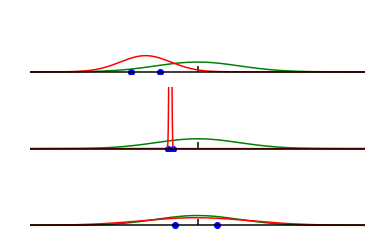

Avg of sample means: -3.215
True mean: 0

Avg of sample variances: 3.184
True variance: 25


In [9]:
#Generate 3 datasets each with 2 points from a Gaussian with mean zero and variance 25
mean = 0
variance = 25
standard_deviation = np.sqrt(variance)

sample = np.sort(np.random.normal(mean, standard_deviation, 6))
data = [sample[:2],sample[2:4],sample[4:]]

sample_means = [np.mean(datum) for datum in data]
sample_variances = [np.sum((datum-np.mean(datum))**2)/len(datum) for datum in data]
print('Data: ',data)
print('Sample Means: ',sample_means)
print('Sample Variances: ',sample_variances)

x = np.linspace(-20,20,1000)
f, (ax1,ax2,ax3) = plt.subplots(3,1)

ax1.set_xlim(-20,20)
ax1.set_ylim(-0.02,0.5)
ax1.plot(x,gaussian(x,mean,standard_deviation),'g')
ax1.plot(x,gaussian(x,sample_means[0],sample_variances[0]),'r')
ax1.axhline(c='k')
ax1.scatter(data[0],[0,0], c='b')
ax1.vlines(0,0,0.05)
ax1.set_axis_off()

ax2.set_xlim(-20,20)
ax2.set_ylim(-0.02,0.5)
ax2.plot(x,gaussian(x,mean,standard_deviation),'g')
ax2.plot(x,gaussian(x,sample_means[1],sample_variances[1]),'r')
ax2.axhline(c='k')
ax2.scatter(data[1],[0,0], c='b')
ax2.vlines(0,0,0.05)
ax2.set_axis_off()

ax3.set_xlim(-20,20)
ax3.set_ylim(-0.02,0.5)
ax3.plot(x,gaussian(x,mean,standard_deviation),'g')
ax3.plot(x,gaussian(x,sample_means[2],sample_variances[2]),'r')
ax3.axhline(c='k')
ax3.scatter(data[2],[0,0], c='b')
ax3.vlines(0,0,0.05)
ax3.set_axis_off()

plt.show()

print(f'Avg of sample means: {np.mean(sample_means):.4}')
print(f'True mean: {mean}')
print()
print(f'Avg of sample variances: {np.mean(sample_variances):.4}')
print(f'True variance: {variance}')

This shows us that for a small $N$ the sample variance has a bias as it is being measured relative to the sample mean rather than the true mean. As $N\rightarrow \infty$ this bias disappears. The sample mean has no such bias.

**Exercise 1.13**

This exercise estimates the variance of a Gaussian using $\mu$ instead of $\mu_{ML}$ and shows that the expectation is given by $\sigma^2$ 

\begin{align}
\text{(1.56)} \implies \sigma^2_{ML} &= \frac{1}{N}\sum^N_{n=1} (x_n-\mu_{ML})^2\\
\mu_{ML}=\mu\implies\sigma^2_{ML} &= \frac{1}{N}\sum^N_{n=1} (x_n-\mu)^2\\
\mathbb E[\sigma_{ML}^2]&=\frac{1}{N}\sum^N_{n=1}\mathbb E[(x_n-\mu)^2]\\
&=\frac{1}{N}\sum^N_{n=1}\mathbb E[x_n^2-2x_n\mu+\mu^2]\\
&=\frac{1}{N}\sum^N_{n=1}\mathbb E[x_n^2]-\frac{2}{N}\sum^N_{n=1}\mathbb E[x_n\mu]+\frac{1}{N}\sum^N_{n=1}\mathbb E[\mu^2]\\
&=\frac{1}{N}\sum^N_{n=1}(\mu^2+\sigma^2)-\frac{2}{N}\sum^N_{n=1}\mathbb E[x_n]\mathbb E[\mu] + \frac{1}{N}\sum^N_{n=1}\mu^2\\
&=\mu^2+\sigma^2 - \frac{2}{N}\sum^N_{n=1}\mu\cdot\mu+\frac{1}{N}N\mu^2\\
&=\mu^2+\sigma^2-2\mu^2+\mu^2\\
&=\sigma^2
\end{align}

# Curve fitting Revisited



View it from a probabalistic perspective.

Gives insights into error functions and regularization.

Takes the problem closer to a Bayesian treatment.

Goal: predict $t$ given $x$ using training data $\mathbf x = (x_1,...,x_N)^T$ and $\mathbf t = (t_1,...,t_N)^T$

The uncertainty over $t$ can be expressed using a probabilty distribution.

Assume mean $y(x,\mathbf w)$

Thus, $p(t|x,\mathbf w,\beta)=\mathcal N(t|y(x,\mathbf w), \beta^{-1})$

The likelihood function is thus $$p(\mathbf t|\mathbf x, \mathbf w, \beta) = \prod^N_{n=1}\mathcal N(t_n|y(x_n,\mathbf w),\beta^{-1})$$

$$\implies \ln p(\mathbf t|\mathbf x,\mathbf w, \beta) = -\frac{\beta}{2}\sum^N_{n=1}\{y(x_n,\mathbf w)-t_n\}^2+\frac{N}{2}\ln\beta-\frac{N}{2}\ln(2\pi)$$

Max wrt $\beta$:

\begin{align}
\frac{\partial}{\partial\beta}\ln p(\mathbf t|\mathbf x,\mathbf w, \beta)&=0\\
-\frac{1}{2}\sum^N_{n=1}\{y(x_n,\mathbf w)-t_n\}^2+\frac{N}{2\beta_{ML}}&=0\\
\frac{N}{\beta_{ML}}&=\sum^N_{n=1}\{y(x_n,\mathbf w)-t_n\}^2\\
\frac{1}{\beta_{ML}} &= \frac{1}{N}\sum^N_{n=1}\{y(x_n,\mathbf w_{ML}) - t_n\}^2
\end{align}